In [1]:
import numpy as np
import pandas as pd
import scipy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
%matplotlib inline
from sklearn import ensemble
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


https://www.kaggle.com/aungpyaeap/fish-market
#### Is it possible to classify fish species based on their physical characteristics using clustering techniques?

In [2]:
fish_df = pd.read_csv('fish.csv')

In [61]:
## Performing Exploratory Data Analysis
print(fish_df.head())
print(fish_df.shape)
print(fish_df['Species'].value_counts())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
(159, 7)
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


In [4]:
fish_df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


Text(0.5, 1.0, 'FISH SPECIES')

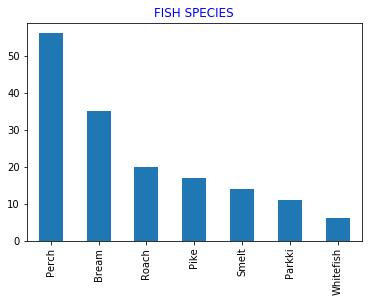

In [5]:
fish_df.Species.value_counts().plot(kind = 'bar', label = True)
plt.title('FISH SPECIES', color = 'blue')

* Species: Species name of a fish 
* Weight : Weight of a fish in Grams
* Length1: Vertical length in CM
* Length2: Diagonal length in CM
* Length3: Cross length in CM
* Height : Height in CM
* Width  : Diagonal width in CM

In [6]:
fish_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

#### There are no missing values in the data

In [7]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
corr_data = fish_df.corr()
print(corr_data)

           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000


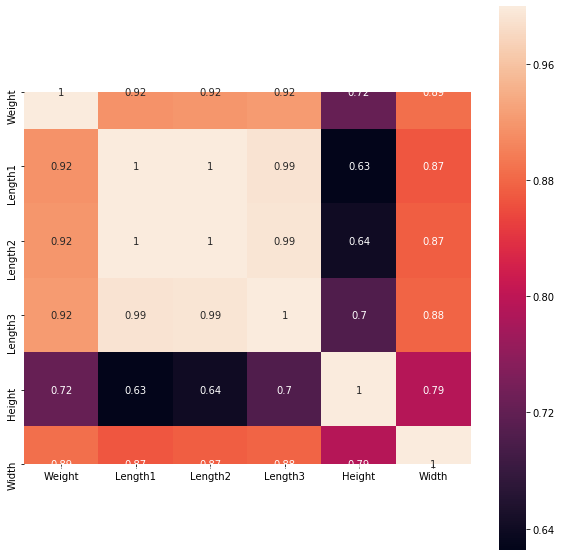

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_data, annot = True, square = True)

#### It appears that all of our variables are highly correlated with each other

In [10]:
X = fish_df.drop('Species', axis = 1)

In [11]:
## Using Label Encoder to convert species column to numbers
le = LabelEncoder()
y = le.fit_transform(fish_df['Species'])

In [12]:
## Using Standard Scaler to scale the variables
scaler = StandardScaler().fit_transform(X)

In [13]:
## Using PCA to reduce the dimensions of the variables for visualization
pca = PCA(n_components = 2).fit_transform(X)

In [14]:
## As we have seven species in the data, we try to form seven clusters using Kmeeans
kmeans_cluster7 = KMeans(n_clusters= 7)
# Fit model
%timeit kmeans_cluster7.fit(scaler)
y_pred_scaler7 = kmeans_cluster7.predict(scaler)
print("Adjusted Rand Index of the Kmeans solution for 7 clusters: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_scaler7)))
print("The silhouette score of the KMeans solution for 7 clusters: {}"
      .format(metrics.silhouette_score(X, y_pred_scaler7, metric='euclidean')))

91.1 ms ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adjusted Rand Index of the Kmeans solution for 7 clusters: 0.3069196182697601
The silhouette score of the KMeans solution for 7 clusters: 0.3620461143623443


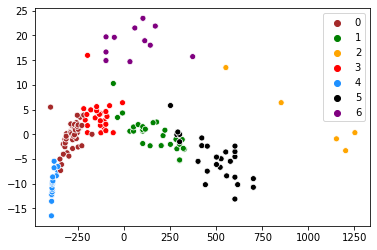

In [15]:
color_dict = dict({0:'brown',
                   1:'green',
                   2: 'orange',
                   3: 'red',
                   4: 'dodgerblue',
                   5: 'black',
                   6: 'purple'})
sns.scatterplot(pca[:,0], pca[:,1], hue = y_pred_scaler7, palette = color_dict)


#### We can see the low scores of Silhouette and ARI when we used KMeans with 7 clusters

In [16]:
## As the evaluation scores are low with 7 clusters in KMeans, lets try to form 4 clusters
kmeans_cluster3 = KMeans(n_clusters= 4, random_state=123)

# Fit model
%timeit kmeans_cluster3.fit(scaler)
y_pred_scaler3 = kmeans_cluster3.predict(scaler)
print("Adjusted Rand Index of the Kmeans solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_scaler3)))
print("The silhouette score of the KMeans solution: {}"
      .format(metrics.silhouette_score(scaler, y_pred_scaler3, metric='euclidean')))

62.9 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adjusted Rand Index of the Kmeans solution: 0.2209785047386537
The silhouette score of the KMeans solution: 0.44046787274537397


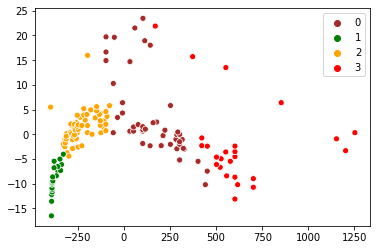

In [17]:
color_dict1 = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue'})
sns.scatterplot(pca[:,0], pca[:,1], hue = y_pred_scaler3, palette = color_dict1)

#### KMeans with 4 clusters slightly improved the Silhouette score but the ARI went down

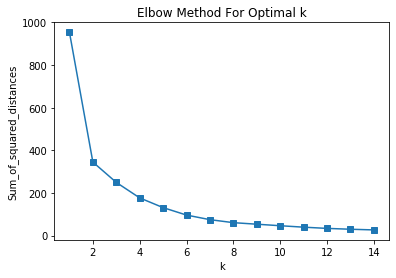

In [18]:
## Plotting an Elbow plot
Sum_of_squared_distances = [] 
K = range(1,15) 
for k in K: 
    km = KMeans(n_clusters=k) 
    km = km.fit(scaler) 
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, marker = 's') 
plt.xlabel('k') 
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k') 
plt.show()

#### Elbow plot above indicates that clusters beyond 3 have little value

In [19]:
# Trying a different clustering technique as KMEANS did not work out
# Defining the DBSCAN clustering
dbscan_cluster = DBSCAN(eps= 5, min_samples= 1)

# Fit model
y_dbscan = dbscan_cluster.fit_predict(X)
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, y_dbscan)))
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X, y_dbscan, metric='euclidean')))

Adjusted Rand Index of the DBSCAN solution: 0.051839623856949
The silhouette score of the DBSCAN solution: 0.4103110185578185


In [20]:
y_dbscan

array([ 0,  1,  2,  3,  4,  5,  6,  7,  5,  6,  8,  6,  6,  9, 10, 10, 11,
       11, 12, 13, 14, 15, 16, 17, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 32, 35, 36, 37, 38, 37, 39, 37, 40,
       41,  1, 42,  7, 42, 42, 43, 44, 45, 46, 47, 48, 49, 32, 35, 38, 50,
       36, 40, 42, 51, 52, 53, 28, 47, 29, 54, 30, 30, 31, 31, 34, 55, 56,
       57, 32, 32, 57, 58, 34, 57, 35, 36, 35, 39, 59, 36, 60, 41, 40, 61,
       51, 62, 63, 64, 64, 51, 65, 66, 67, 68, 69, 70, 70, 71, 72, 73, 74,
       75, 72, 76, 74, 77, 46, 77, 46, 46, 78, 79, 79, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 52, 52, 52, 52, 52, 52, 52, 52,
       52, 52, 52, 52, 93, 93])

#### It appears that the DBSCAN approach above produced more than 7 clusters

In [21]:
#Trying the DBSCAN with dofferent eps and min_samples
# Defining the DBSCAN clustering
dbscan_cluster1 = DBSCAN(eps= 1, min_samples=2)

# Fit model
y_dbscan1 = dbscan_cluster1.fit_predict(scaler)
print("Adjusted Rand Index of the DBSCAN Scaler solution: {}"
      .format(metrics.adjusted_rand_score(y, y_dbscan1)))
print("The silhouette score of the DBSCAN Scaler solution: {}"
      .format(metrics.silhouette_score(scaler, y_dbscan1, metric='euclidean')))

Adjusted Rand Index of the DBSCAN Scaler solution: 0.015509273930136376
The silhouette score of the DBSCAN Scaler solution: 0.5001725822810027


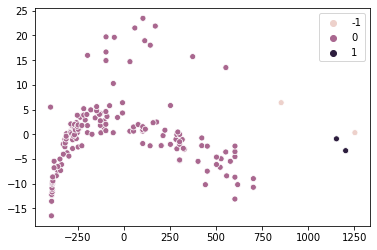

In [22]:
sns.scatterplot(pca[:,0], pca[:,1], hue = y_dbscan1)

In [23]:
## Precited clusters below are 0, 1 and -1.  -1 is noise and the values with -1 are outliers
y_dbscan1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

**WE CAN SEE THAT DBSCAN IS PRODUCING TWO CLUSTERS, CLUSTER 0 HAS LOTS OF VALUES, CLUSTER 1 HAS LESS VALUES AND THE OTHER ONE IS NOISE**

In [24]:
# Defining the agglomerative clustering
agg_cluster1 = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters= 3)

# Fit model
agg_clusters1 = agg_cluster1.fit_predict(scaler)
print("Adjusted Rand Index of the Hierarchical cosine solution: {}"
      .format(metrics.adjusted_rand_score(y, agg_clusters1)))
print("The silhouette score of the Hierarchical cosine solution: {}"
      .format(metrics.silhouette_score(scaler, agg_clusters1, metric='cosine')))

Adjusted Rand Index of the Hierarchical cosine solution: 0.15291178411021986
The silhouette score of the Hierarchical cosine solution: 0.7565634826441994


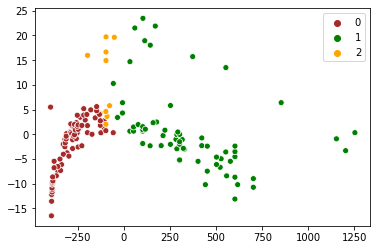

In [25]:
sns.scatterplot(pca[:,0], pca[:,1], hue = agg_clusters1, palette = color_dict)

#### we can see from the plots and scores above Hierarchical clustering with cosine produced good results

In [26]:
#Using Gaussian Mixture approach to improve clusters
from sklearn.mixture import GaussianMixture
gmm_cluster = GaussianMixture(n_components=3, random_state=123)
# Fit model
gmm_clusters = gmm_cluster.fit_predict(scaler)
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, gmm_clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(scaler, gmm_clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.24573785071382798
The silhoutte score of the GMM solution: 0.45546324902134633


In [27]:
X1 = X.copy()

In [28]:
## Taking the average of length variable
X1['Avg_Length'] = (X['Length1']+X['Length2']+X['Length3'])/3

In [29]:
X1.drop(['Length1', 'Length2', 'Length3'], axis = 1, inplace = True)
print(X1.head(2))

   Weight  Height   Width  Avg_Length
0   242.0   11.52  4.0200   26.200000
1   290.0   12.48  4.3056   27.166667


In [30]:
scaler1 = StandardScaler().fit_transform(X1)

In [31]:
# Defining the agglomerative clustering to use with X1 dataset((Average Length used))
agg_clusterx3 = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters= 3)

# Fit model
agg_clustersx3 = agg_clusterx3.fit_predict(scaler1)
print("Adjusted Rand Index of the Hierarchical cosine solution: {}"
      .format(metrics.adjusted_rand_score(y, agg_clustersx3)))
print("The silhouette score of the Hierarchical cosine solution: {}"
      .format(metrics.silhouette_score(scaler1, agg_clustersx3, metric='cosine')))

Adjusted Rand Index of the Hierarchical cosine solution: 0.32522792385959104
The silhouette score of the Hierarchical cosine solution: 0.711963500137587


**Averaging the length did not make the evaluation score better**

In [32]:
x3 = X.drop('Width', axis = 1)

In [33]:
x3['Length'] = X1['Avg_Length']
x3.drop(['Length1', 'Length2', 'Length3'], inplace = True, axis = 1)
print(x3.head())

   Weight   Height     Length
0   242.0  11.5200  26.200000
1   290.0  12.4800  27.166667
2   340.0  12.3778  27.166667
3   363.0  12.7300  29.600000
4   430.0  12.4440  29.833333


In [34]:
scaler2 = StandardScaler().fit_transform(x3)

In [35]:
# We took the average of the length Variable and dropped the width variable
# Defining the agglomerative clustering to use with x3 dataset without the height variable
scaler2_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters= 3)

# Fit model
scaler2_clusters = scaler2_cluster.fit_predict(scaler2)
print("Adjusted Rand Index of the Hierarchical cosine solution: {}"
      .format(metrics.adjusted_rand_score(y, scaler2_clusters)))
print("The silhouette score of the Hierarchical cosine solution: {}"
      .format(metrics.silhouette_score(scaler2, scaler2_clusters, metric='cosine')))

Adjusted Rand Index of the Hierarchical cosine solution: 0.276749326486643
The silhouette score of the Hierarchical cosine solution: 0.7908330389461612


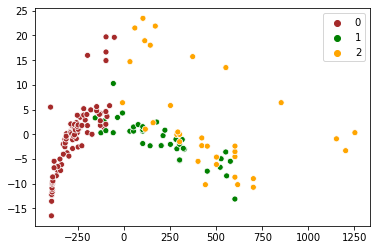

In [36]:
sns.scatterplot(pca[:,0], pca[:,1], hue = scaler2_clusters, palette = color_dict)

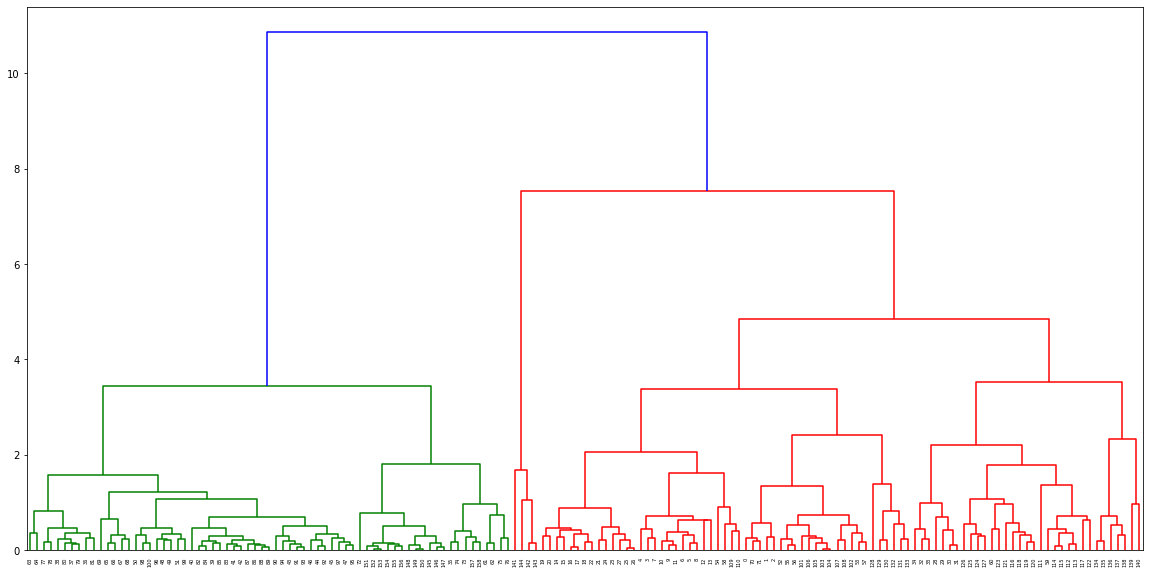

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
dendrogram(linkage(scaler, method='complete'))
plt.show()

In [55]:
#Dropping the height variable, adding back width varaible, keeping the length variable as original 
x4 = X.drop('Height', axis = 1)
scaler3 = StandardScaler().fit_transform(x4)

# Defining the agglomerative clustering to use with x3 dataset without the height variable
scaler3_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters= 3)

# Fit model
scaler3_clusters = scaler3_cluster.fit_predict(scaler3)
print("Adjusted Rand Index of the Hierarchical cosine solution: {}"
      .format(metrics.adjusted_rand_score(y, scaler3_clusters)))
print("The silhouette score of the Hierarchical cosine solution: {}"
      .format(metrics.silhouette_score(scaler3, scaler3_clusters, metric='cosine')))

Adjusted Rand Index of the Hierarchical cosine solution: 0.14585873057287524
The silhouette score of the Hierarchical cosine solution: 0.8371228858884264


#### Dropping height variable, adding back width variable, keeping Length1, Length2 and Length3 variable increased Silhouette score to 0.837

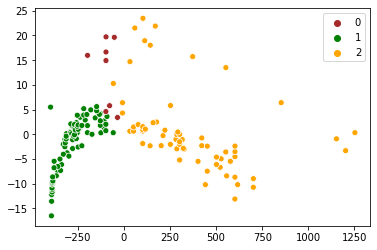

In [39]:
sns.scatterplot(pca[:,0], pca[:,1],hue = scaler3_clusters, palette = color_dict)

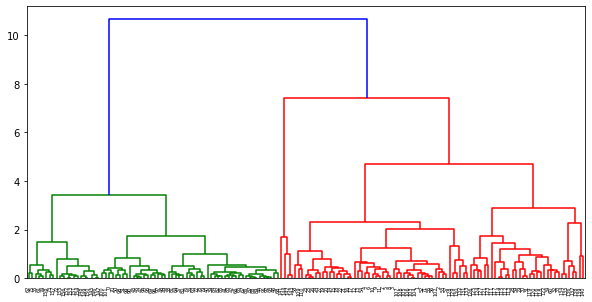

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,5))
dendrogram(linkage(scaler3, method='complete'))
plt.show()

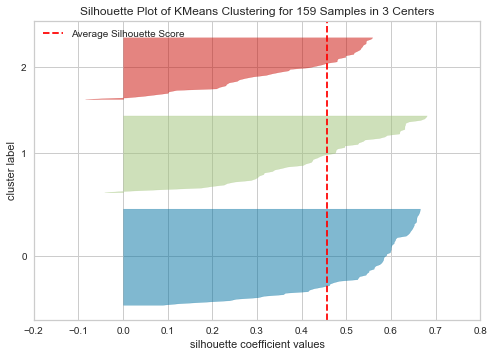

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ffcb386f780>,
                     colors='yellowbrick', is_fitted='auto', model=None)

In [41]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(3, random_state=42), scaler3, colors='yellowbrick')

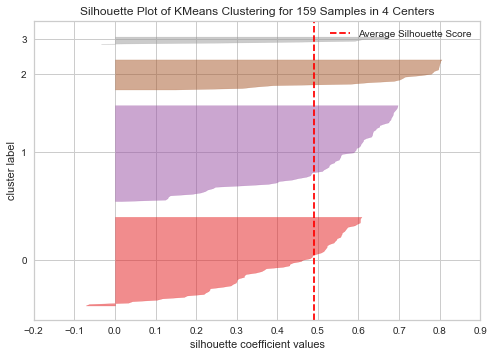

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer
model = SilhouetteVisualizer(KMeans(4))
model.fit(scaler)
model.show()

#### From the above silhouette visualizer we can see that 4 clusters reduces the density of our clusters and 3 clusters look optimal

In [60]:
k = range(1,8)
silhouette = []
for i in k:
    scaler3_cluster1 = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters= i+1)
    scaler3_clusters1 = scaler3_cluster1.fit_predict(scaler3)

    silhouette.append(metrics.silhouette_score(scaler3, scaler3_clusters1, metric='cosine'))
print(silhouette)

[0.8986700505544041, 0.8371228858884264, 0.7955010045955365, 0.7971499457439062, 0.7374950534342923, 0.7372612036742222, 0.7517345873147684]


Text(0.5, 1.0, 'Silhouette scores for different number of clusters')

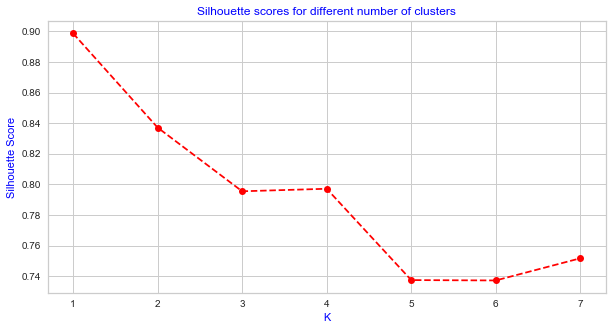

In [59]:
plt.figure(figsize=(10,5))
plt.plot(k, silhouette,color = 'red',linestyle = 'dashed', marker = 'o')
plt.xlabel('K', color = 'blue')
plt.ylabel('Silhouette Score', color = 'blue')
plt.title('Silhouette scores for different number of clusters', color = 'blue')

### Conclusion
#### From the plots  and evaluation scores above, we can see that the clusters beyond 3 have little value and we can also see that the different type of fish in our dataset have high similarities in their physical characteristics and due to those similarites we are not able to differentiate all the species, however, if the dataset is large our clustering techniques would have performed better.

### NEXT STEPS:   
#### Collecting more data and performing the steps above would help in separating our clusters better
